### Encoder y Decoder

¿Cual de estas secuencias es mas fácil de aprender?

- c1 = [1,34,5,56,32,678,345,32,645,43]
- c2 = [58,56,54,52,50,48,46,...,10,8,6,4,2,0]

Por longitud, seria la primera, sin embargo, si podemos obtener el patrón que describe la segunda, entonces solo tendríamos que aprender la formula; el resto seria un proceso generativo. Esto es exactamente lo que tratan de hacer los AE.

**Encoder:**
- Evalúa la cadena c2 y obtiene el módelo latente (la formula y sus parámetros)

**Decoder:**
- Genera la lista a partir del modelo latente.

Ahora, hay una distinción respecto al ejemplo anterior cuando trabajamos con AE, y es que vamos a usar redes neuronales para generar el modelo latente. Como uds ya saben, los modelo generados con NN están sujetos a error y a cierta aleatoriedad, por tanto el Decoder no va a generar exactamente lo mismo que viene de entrada, sino una reconstrucción aproximada, de lo que nos vamos a aprovechar para utilizarlo para generar “cosas distintas” pero similares.

### Mi Primer Autoencoder Neuronal

Vamos a crear un AE que comprime un dataset 3D en 2D y luego lo vuelve a reestablecer en 3D. Este autoencoder hace algo similar a PCA, que podemos hacer reduccion de dimensionalidad con redes neuronales!

#### Modelo AE

In [1]:
from tensorflow import keras

# codificador, de 3D a 2D
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])

# decodificador de 2D a 3D
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

# AE: pegamos las 2 redes neuronales de forma secuancial
AE = keras.models.Sequential([encoder, decoder])

# compilar el modelo
AE.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.01))

#### Generacion de Nuevo Dataset 3D

           x         y          z
0  -1.034673 -0.208920   4.476858
1   0.669211  0.295933   1.030151
2  -0.503947  0.886983  12.106011
3   0.428952 -0.951278   2.523553
4   0.871420 -0.297051  14.496384
..       ...       ...        ...
95  0.921419 -0.272146   1.882007
96 -0.545389 -0.587954  10.170804
97 -0.328596 -0.981786   9.822039
98 -0.578810  0.804890  12.012464
99  0.615817  0.745317   0.502114

[100 rows x 3 columns]


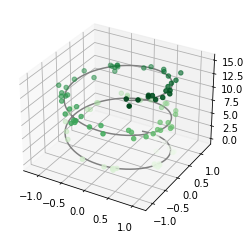

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

fig = plt.figure()
ax = plt.axes(projection='3d')

# generar la linea
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# generar datos del scatter
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

# creamos un df de pandas
df = pd.DataFrame({'x':xdata, 'y':ydata, 'z':zdata})
print(df)

In [7]:
hist = AE.fit(df.values,df.values, epochs=50)
gen = AE.predict(df.values)
gen.shape

Train on 100 samples
Epoch 1/50
100/100 [==============================] - 0s 280us/sample - loss: 0.2287
Epoch 2/50
100/100 [==============================] - 0s 70us/sample - loss: 0.2401
Epoch 3/50
100/100 [==============================] - 0s 50us/sample - loss: 0.1917
Epoch 4/50
100/100 [==============================] - 0s 60us/sample - loss: 0.2125
Epoch 5/50
100/100 [==============================] - 0s 60us/sample - loss: 0.1904
Epoch 6/50
100/100 [==============================] - 0s 60us/sample - loss: 0.1950
Epoch 7/50
100/100 [==============================] - 0s 80us/sample - loss: 0.1850
Epoch 8/50
100/100 [==============================] - 0s 60us/sample - loss: 0.1964
Epoch 9/50
100/100 [==============================] - 0s 70us/sample - loss: 0.1838
Epoch 10/50
100/100 [==============================] - 0s 80us/sample - loss: 0.1869
Epoch 11/50
100/100 [==============================] - 0s 70us/sample - loss: 0.1853
Epoch 12/50
100/100 [==============================]

(100, 3)

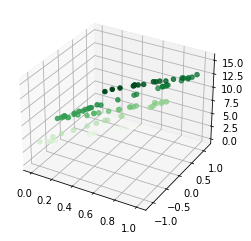

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# generar datos del scatter
zdata = gen[:,2]
xdata = gen[:,0]
ydata = gen[:,1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');